# Intelligent Agents: Reflex Agents for the Vacuum-cleaner World


## Instructions

Total Points: undergrad 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation,
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square is cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [85]:
from numpy import random

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return random.choice(actions)

In [86]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'east'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

This simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns the performance measure which is here the number of cleaned squares (since all squares are constantly dirty, it is the number of `suck` actions by the agent). 

In [87]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with 20 steps.

In [88]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: north
step 1 - action: west
step 2 - action: south
step 3 - action: west
step 4 - action: south
step 5 - action: south
step 6 - action: south
step 7 - action: south
step 8 - action: north
step 9 - action: west
step 10 - action: west
step 11 - action: suck
step 12 - action: west
step 13 - action: suck
step 14 - action: west
step 15 - action: north
step 16 - action: east
step 17 - action: south
step 18 - action: south
step 19 - action: south


2

# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can add additional Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. 

_Note:_ Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment [2 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty.
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment needs to work with the simple randomized agent program from above and then it can be used for your agent implementation in the tasks below.

In [89]:
# initial a cols*rows area and make some dirty with the probability of dirty_p
def create_env(cols, rows, dirty_p,obs_p=0.2):
    env = []
    for i in range(cols):
        row = []
        for j in range(rows):
            row.append(0 if random.random_sample()>dirty_p else 1)
        env.append(row)
    return env

In [90]:
#
def simulation_environment(agent, env, max_steps, verbose = True):
    num_dirty = 0
    num_action = 0
    num_cleaned = 0
    bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
    dirty = False
    
    while True:
        agent_locatey = random.randint(1,len(env))#original location y of agent
        agent_locatex = random.randint(1,len(env[0]))#original location x of agent
        if env[agent_locatey][agent_locatex]<=1:break
        
    if (verbose): print("start y:",agent_locatey," start x:",agent_locatex)
    for i in range(len(env)):
        for j in range(len(env[i])):
            if env[i][j] == 1 :
                num_dirty+=1
    
    if (verbose):print("num_dirty: ",num_dirty)

    for i in range(max_steps):
        if agent_locatex-1 < 0 or env[agent_locatey][agent_locatex-1]>1 : bumpers['west'] = True
        else : bumpers['west'] = False
        if agent_locatex+1 >= len(env[0]) or env[agent_locatey][agent_locatex+1]>1 : bumpers['east'] = True
        else : bumpers['east'] = False
        if agent_locatey-1 < 0 or env[agent_locatey-1][agent_locatex]>1 : bumpers['north'] = True
        else : bumpers['north'] = False
        if agent_locatey+1 >= len(env) or env[agent_locatey+1][agent_locatex]>1 : bumpers['south'] = True
        else : bumpers['south'] = False

        if env[agent_locatey][agent_locatex] == 1: 
            dirty = True
        else: 
            dirty = False
        action = agent(bumpers,dirty)
        if (verbose): print("step",i,"- action:",action)
        # if (verbose): print(bumpers)

        if action=="north" and bumpers['north']==False : agent_locatey-=1    
        elif action=="south" and bumpers['south']==False : agent_locatey+=1  
        elif action=="west" and bumpers['west']==False : agent_locatex-=1   
        elif action=="east" and bumpers['east']==False : agent_locatex+=1
        elif action=="suck" and env[agent_locatey][agent_locatex]==1:
            num_dirty-=1
            env[agent_locatey][agent_locatex] = 0 # the square is clean
            if num_dirty == 0: 
                num_action = i
                break
        
        if (verbose):print("agent now position, y: ",agent_locatey," x: ",agent_locatex)

    return num_action

In [91]:
#a = simulation_environment(simple_reflex_agent, create_env(5,5,0.2), max_steps = 100)
# a = simulation_environment(simple_randomized_agent, create_env(5,5,0.2), max_steps = 100)
#print("number of actions: ",a)

## Task 2:  Implement a simple reflex agent [1 Point] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ The agent cannot directly use variable in the environment. It only gets the percepts as the arguments to the agent program function.

In [92]:
# Your code and description goes here
def simple_reflex_agent(bumpers,dirty):
    if dirty==1:
        return "suck"
    else:
        actions = []
        for key in bumpers.keys():
            if bumpers[key] == False:
                actions.append(key)
        if len(actions): return random.choice(actions)
        else : return "stay"

## Task 3: Implement a model-based reflex agent [3 Point]

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has. It can move to a corner to determine its location and then is able to use more advanced navigation.

Describe how you define the __agent state__ and how your agent works before implementing it. _Note on implementing the state in Python:_ [Examples](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb)

# Your short description of the state and your implementation goes here
My design has serveral prerequisites:
* the robot knows the layout of the room
* there are no any obstacles inside the room

The action of the robot:
1. find a corner

The robot first trys to find the corner of north west wherever it locates. It trys to the north until the bumper sensor hits the wall. Then it heads to the west until it hits the wall. That is the corner it starts. 

2. start to regular sweeping
It head east when in the even number of row until hit the wall of east. Then move one square toward south, which means it should head west in the odd number of row.
According to the east-west rule, it stay when it hit the wall of south, which denotes it completes all the squares of the room.


In [93]:
def agent_environment(agent_act, env, max_steps, verbose = True):
   bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
   dirty = False
   num_action = 0
   num_dirty = 0

   while True:# ensure the robot location is not on the obstacle
      agent_locatey = random.randint(1,len(env))#original location y of agent
      agent_locatex = random.randint(1,len(env[0]))#original location x of agent
      if env[agent_locatey][agent_locatex]<=1:break
   
   if (verbose):print("agent current posy:",agent_locatey," current posx: ",agent_locatex)

   for i in range(len(env)):
        for j in range(len(env[i])):
            if env[i][j] == 1 :
                num_dirty+=1


   for i in range(max_steps):
      if agent_locatex-1 < 0 or env[agent_locatey][agent_locatex-1]>1 : bumpers['west'] = True
      else : bumpers['west'] = False
      if agent_locatex+1 >= len(env[0]) or env[agent_locatey][agent_locatex+1]>1 : bumpers['east'] = True
      else : bumpers['east'] = False
      if agent_locatey-1 < 0 or env[agent_locatey-1][agent_locatex]>1 : bumpers['north'] = True
      else : bumpers['north'] = False
      if agent_locatey+1 >= len(env) or env[agent_locatey+1][agent_locatex]>1 : bumpers['south'] = True
      else : bumpers['south'] = False

      if env[agent_locatey][agent_locatex] == 1:
         num_dirty -= 1 
         dirty = True
      else: 
         dirty = False

      action = agent_act(bumpers,dirty)
      if (verbose): print("step",i,"- action:",action)
        
      if action=="north" : agent_locatey-=1    
      elif action=="south" : agent_locatey+=1  
      elif action=="west" : agent_locatex-=1   
      elif action=="east" : agent_locatex+=1
      elif action=="suck":   
         env[agent_locatey][agent_locatex] = 0 # the square is clean
      elif action == "stay" :
         num_action = i     
         break

   if (verbose):print("remained dirty cells: ",num_dirty)
   if num_dirty!=0 : return 0      
   return num_action

In [94]:
# Your code goes here
class ModelBaseReflexAgent:
    def __init__(self, name = "A Model-Base Agent"):
        self.cur_posx = 0
        self.cur_posy = 0
        self.name = name
        self.find_a_corner = False

    def act(self, percepts_blocked, dirty):
        if dirty == True:
            return 'suck'
        #set a particular corner, for example, north west
        if percepts_blocked['north'] and percepts_blocked['west'] and self.find_a_corner==False :
                self.find_a_corner = True

        if self.find_a_corner==True:
            #since targeted corner is north west, the robot should head east in even row and head west in odd row
            #if the robot hit a corner and it couldn't move based on the rule, then it just stay, which means it walk through all the squares.
            if self.cur_posy%2 == 1:
            #odd number of row, it should head west
                if percepts_blocked['west'] == False:
                    self.cur_posx -= 1
                    return 'west'
                else :
                    if percepts_blocked['south'] == False:
                        self.cur_posy += 1
                        return 'south'
                    else:
                        return 'stay'
            else :
            #even number of row, it should head east.
                if percepts_blocked['east']==False :
                    self.cur_posx += 1
                    return 'east'
                else:
                    if percepts_blocked['south'] == False:
                        self.cur_posy += 1
                        return 'south'
                    else :
                        return 'stay'

        else:
            #keep finding a corner
            if percepts_blocked['north'] == False:
                return "north"
            elif percepts_blocked['west'] == False:
                return 'west'


In [95]:
env = create_env(5,5,0.2)
agent1 = ModelBaseReflexAgent(name = "Agent 1")
agent_environment(agent1.act, env, 100)

agent current posy: 4  current posx:  2
step 0 - action: north
step 1 - action: north
step 2 - action: north
step 3 - action: north
step 4 - action: west
step 5 - action: suck
step 6 - action: west
step 7 - action: east
step 8 - action: east
step 9 - action: east
step 10 - action: east
step 11 - action: south
step 12 - action: west
step 13 - action: west
step 14 - action: west
step 15 - action: suck
step 16 - action: west
step 17 - action: south
step 18 - action: east
step 19 - action: east
step 20 - action: east
step 21 - action: east
step 22 - action: south
step 23 - action: suck
step 24 - action: west
step 25 - action: west
step 26 - action: west
step 27 - action: west
step 28 - action: south
step 29 - action: east
step 30 - action: east
step 31 - action: east
step 32 - action: east
step 33 - action: stay
remained dirty cells:  0


33

## Task 4: Simulation study [3 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results in a suitable format (tables, graphs) and discuss the differences. 

Here is some help with [charts and tables.](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb)

According to the plots below, I have several observations:
* The randomize agent is the worst energy efficiency among these three agents.
* Simple reflex agent is much lower energy efficiency than the model-based reflex agent.
* The energy cost of simple reflex agent is more fluctuant while the modle-based agent is stable.
* The energy cost of model-based agent is easy to predict, approximately 1.1 times the number of squares.
* When the room gets larger, the random agent gets much lower energy efficiency, which means that the energy of cleaning needed per square cell has a significant increasing. 
* A good algorithm of walking through all the cells in the room is the guarantee to the energy cost efficiency.   

In [96]:
# Your code goes here
import numpy as np
import pandas as pd

def getDataFrameOfAgents(x,y,dirty_p,obs_p,test_times=100,max_steps=200,env_ini=create_env):
    performance_simple_randomized_agent = []
    performance_simple_reflex_agent = []
    performance_mode_based_reflex_agent = []

    for i in range(test_times):
        env = env_ini(y,x,dirty_p,obs_p)
        performance_simple_randomized_agent.append(
            simulation_environment(simple_randomized_agent, env, max_steps, False)
        )
        performance_simple_reflex_agent.append(
            simulation_environment(simple_reflex_agent, env, max_steps, False)
        )
        agent1 = ModelBaseReflexAgent(name = "Agent 1")
        performance_mode_based_reflex_agent.append(
            agent_environment(agent1.act, env, max_steps, False)
        )
    df = pd.DataFrame(
        {
            "simple_randomized_agent" : performance_simple_randomized_agent,
            "simple_reflex_agent" : performance_simple_reflex_agent,
            "simple_model_based_agent" : performance_mode_based_reflex_agent
        }
    )
    #since the zero value indicates the robot doesn't finish the job, I would replace it with the max steps
    df.replace(0, max_steps, inplace=True)
    return df


In [99]:
import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns 
sns.set(style="whitegrid")

def getLinePlot(x,y,df,test_times=100):
    x_ax = range(test_times)
    plt.plot(x_ax, df.simple_randomized_agent, label = "simple randomized agent") 
    plt.plot(x_ax, df.simple_reflex_agent, label = "simple reflex agent") 
    plt.plot(x_ax, df.simple_model_based_agent, label = "model-based reflex agent") 
    plt.xlabel("Run times")
    plt.ylabel("Energy cost")
    plt.legend()
    plt.suptitle("simple randomized agent, simple reflex agent vs model-based reflex agent in squares "+str(y)+"*"+str(x))
    plt.show()

def getMeanBarPlot(x,y,df):
    df.mean().plot(kind="bar",title="mean performance of simple randomized agent,simple reflex agent vs model-based reflex agent in squares "+str(y)+"*"+str(x))

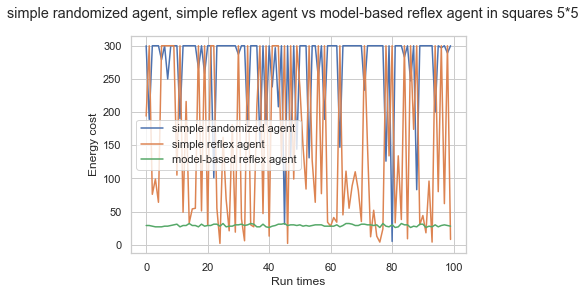

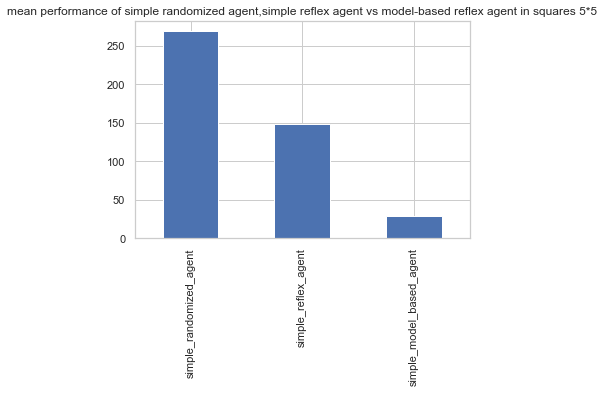

In [100]:
df5 = getDataFrameOfAgents(5,5,0.2,0.2,100,300)
getLinePlot(5,5,df5)
getMeanBarPlot(5,5,df5)

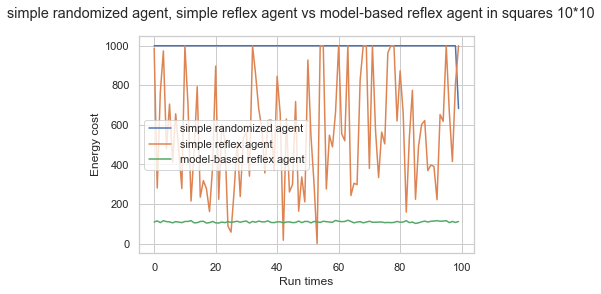

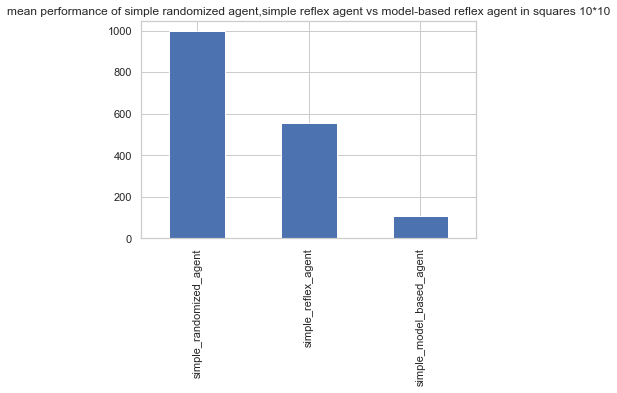

In [101]:
df10 = getDataFrameOfAgents(10,10,0.2,0.2,max_steps=1000)
getLinePlot(10,10,df10)
getMeanBarPlot(10,10,df10)

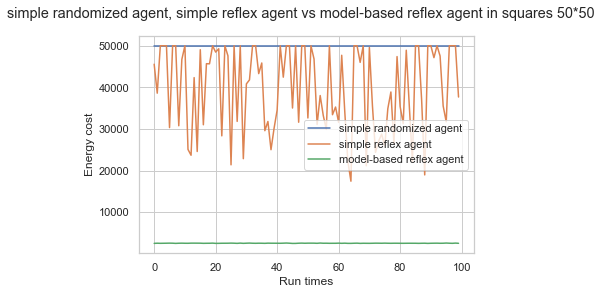

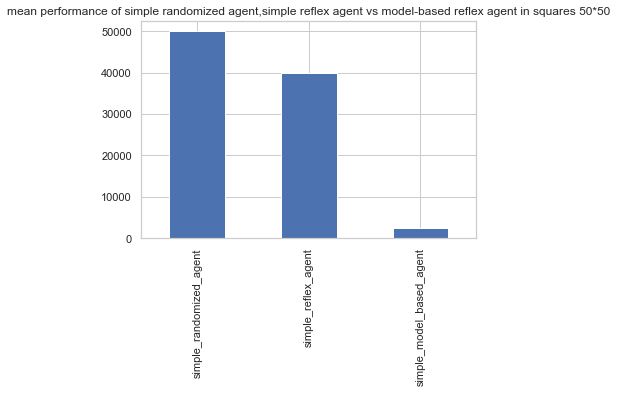

In [102]:
df50 = getDataFrameOfAgents(50,50,0.2,0.2,max_steps=50000)
getLinePlot(50,50,df50)
getMeanBarPlot(50,50,df50)

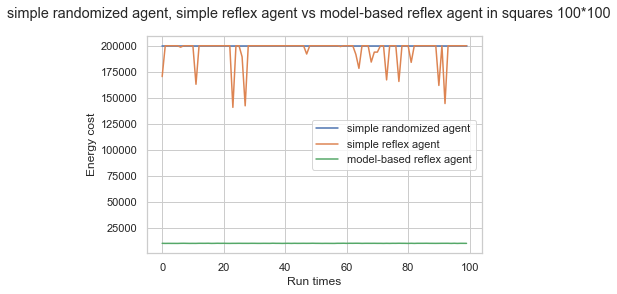

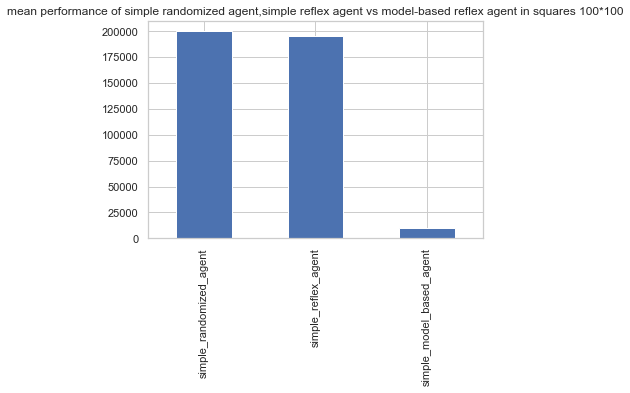

In [103]:
df100 = getDataFrameOfAgents(100,100,0.2,0.2,100,max_steps=200000)
getLinePlot(100,100,df100)
getMeanBarPlot(100,100,df100)

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

In [104]:
dff = pd.DataFrame(
    data = {
        "Simple Randomized Agent":[df5.mean().values[0],df10.mean().values[0],df50.mean().values[0],df100.mean().values[0]],
        "Simple Reflex Agent":[df5.mean().values[1],df10.mean().values[1],df50.mean().values[1],df100.mean().values[1]],
        "Model-based Reflex Agent":[df5.mean().values[2],df10.mean().values[2],df50.mean().values[2],df100.mean().values[2]],
    },index = {"5*5":0,"10*10":1,"50*50":2,"100*100":3}
)
dff

,Simple Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
5*5,268.65,148.59,29.08
10*10,996.83,555.67,109.75
50*50,50000.00,39791.56,2547.67
100*100,200000.00,195608.50,10104.40


## Task 5: Robustness of the agent implementations [1 Point]
Describe how your agent implementations will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors)

## Answer goes here


* if it is put into a rectangular room with unknown size,


1. The simple reflex agent and randomized agent would be affected in this situation since they don't know how to finish its job. In my algorithm, I assume they know how many dirty square cells needed to clean so they can terminate their job by finishing sufficient dirty cells or running out of battery. However, without knowing the room size, they would keep working until running out of battery.
2. The model-based agent would still work fine if it's in a rectangular room without knowing the size of the room. Because it find a corner, and move like a snake unitl it hit the diagonal corner, which denotes that it complete its job if there are no any obstacles.

* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or

1. The simple reflex agent may have two circumstances:

    (1) It spends much more energy to finish the clean job. In other words, it may spend much more time on the clean job.
    
    (2) It walks back and forth between the way of going to charge and launching to clean


2. The model-based agent may cover parts of square cells in the room. Perhaps it just finishes one room and ignores the hallway and the other room, or it cleans both some parts of the two rooms. 


* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors)

1. The simple reflex agent may finish the clean job in this situation, but it's energy cost is huge.
2. The model-based agent may clean a small propotion of the room because it may treat the obstacles as the wall.



## Graduate student advanced task: Obstacles [1 Point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [105]:
#create the cols*rows env, make some dirty with the probability of dirty_p and some obstacles with the probability of obs_p
def create_env_obs(cols,rows,dirty_p,obs_p=0.2):
    env = []
    for i in range(cols):
        row = []
        for j in range(rows):
            if random.random_sample() <= dirty_p:
                value = 1
            elif random.random_sample() <= obs_p:
                value = 3
            else :
                value = 0
            row.append(value)
        env.append(row)
    return env

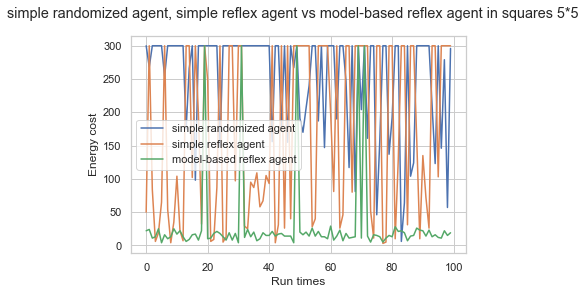

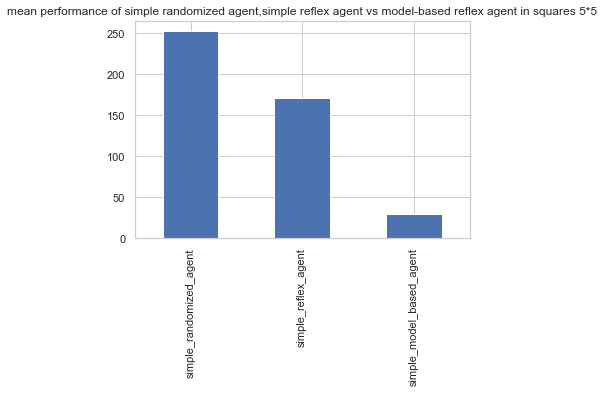

In [106]:
#the performance of three agents
df5_ob = getDataFrameOfAgents(5,5,0.2,0.2,100,300,create_env_obs)
getLinePlot(5,5,df5_ob)
getMeanBarPlot(5,5,df5_ob)

To avoid the blocking effect to the room, I set maximum number of obstacles to 4. If the model-based agent can't reduce the dirty square cells to the zero, its energy cost would be set to equal the max steps.

Under this situation, the model-based agent surprisingly performs better than the other two agents. 


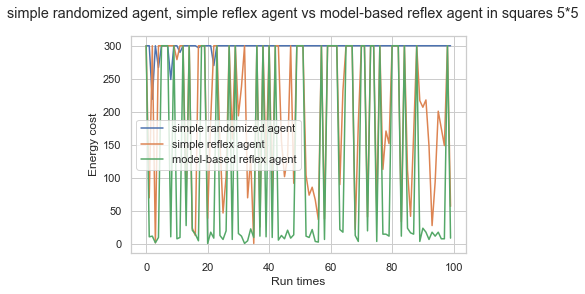

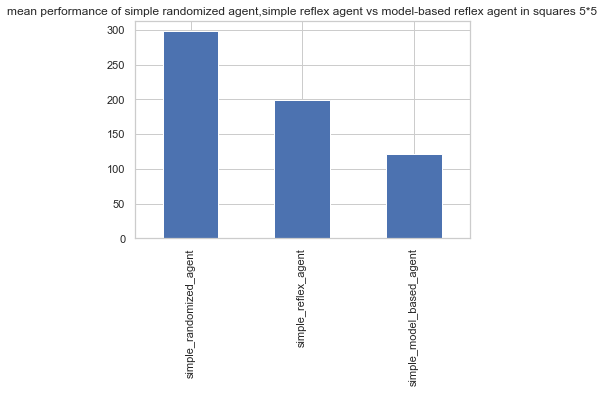

In [107]:
#the performance of three agents
df5_ob = getDataFrameOfAgents(5,5,0.6,0.6,100,300,create_env_obs)
getLinePlot(5,5,df5_ob)
getMeanBarPlot(5,5,df5_ob)

If increasing the probability of dirty to the 0.6 and of obstacles to the 0.6, then the performance of model-based agent decreases. Maybe it can combine the randomly walking algorithm to complete the sweeping job.

## More advanced tasks to think about

You can think about these:

* __Unknown environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square.

* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. We assume the agent has learned this information over time. For the implementation, we give this information to the agent as a 2-dimensional array of probabilities  Cleaning one dirty square produces a utility of 1. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 10000 time steps. This is very tricky!

In [108]:
# Your ideas/code